# __Activation Functions__

In [6]:
import numpy as np

<img src="https://cdn-images-1.medium.com/max/800/0*lo8wlkwReDcXkts0.png" width ="700" height=700 ></img>

### Source for activation function reference

url = "https://patrickhoo.wixsite.com/diveindatascience/single-post/2019/06/13/activation-functions-and-when-to-use-them"

### Sigmoid Function

1. The sigmoid function is one fo the most used activation functions also called as S-curve
2. It scales the value between 0 - 1
3. Differential meaning that we can find the slope of the curve at any two points

In [7]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [8]:
arr = np.array([1,2,3])
sigmoid(arr)

array([0.73105858, 0.88079708, 0.95257413])

## Tanh function

1. A hyperbolic tangent(tanh) function outputs value between -1 and +1
2. Differential, meaning that we can find the slope of the curve at any point


In [9]:
def tanh(x):
    numerator = 1 - np.exp(-2*x)
    denominator = 1 + np.exp(-2*x)
    return numerator/denominator

## ReLU (Rectified Linear Unit)

1. outputs values between 0 and infinity
2. Problem: Dying ReLU

In [10]:
def ReLU(x):
    return 0 if x<0 else x

## Leaky ReLU or PReLU (Parametric ReLU function)

1. Leaky ReLU is a variant of ReLU function that solves the dying ReLU problem
2. Instead of converting every negative input to zero, it has a small slope for a negative value
3. If we set alpha as parameter rather than default value, we call it as Parametric ReLU
4. If a random value is set to alpha then it is called __Randomized ReLU Function__


In [11]:
def leakyReLU(x, alpha=0.01):
    return alpha*x if x<0 else x

## Exponention Linear Unit (ELU) Function

1. like leaky ReLU has a small slpe for negative value
2. But instead of having a straight line it has a log curve instead of converting every negative input to zero, it has a small slope for a negative value

In [12]:
def ELU(x, alpha=0.01):
    return alpha*(np.exp(x)-1) if x<0 else x

## Swish function
1. The swish function is recently introduced activation function by Google
2. Unlike other activation functions, which are monotonic, swish is a non-monotonic function, which means it is neither always non-increasing nor non-decreasing
3. It provides better performance than ReLU
4. Self gated activation function

<img src="https://forums.fast.ai/uploads/default/original/2X/2/210bd227a378be10a1fe7ea50466e131c8a2d5eb.png" width ="800" height=800 ></img>

In [13]:
def swish(x,beta):
    return 2*x*sigmoid(beta*x)

# all these funcitons are used in hidden layers and not in output layer

# For multiclass classification we need softmax function  

## Softmax


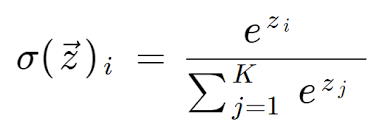</img>

In [15]:
def softmax(x):
    return np.exp(x)/np.exp(x).sum(axis=0)

In [43]:
class Activation:
    
    def __init__(self,x, activation='sigmoid', alpha=0.01, beta=None):
        self.activation = activation
        self.alpha = alpha
        self.beta = beta
        self.x = x
        self.result = self._result(self.x, alpha=self.alpha, beta=self.beta)
        
    def _result(self, x, alpha=0.01, beta=None):
        assert (self.activation == 'swish' and self.beta !=None), "Please provide a beta value for swish activation"
        return getattr(self, self.activation)()
        
    def sigmoid(self):
        return 1/(1+np.exp(-self.x))
    
    def tanh(self):
        numerator = 1 - np.exp(-2*self.x)
        denominator = 1 + np.exp(-2*self.x)
        return numerator/denominator
    
    def ReLU(self):
        return 0 if self.x<0 else self.x
    
    def leakyReLU(self):
        return self.alpha*self.x if self.x<0 else self.x
    
    def ELU(self):
        return self.alpha*(np.exp(self.x)-1) if self.x<0 else self.x
    
    def swish(self):
        return 2*self.x*sigmoid(self.beta*self.x)
    
    def softmax(self):
        return np.exp(self.x)/np.exp(self.x).sum(axis=0)

In [45]:
Activation(4,activation='swish',beta=0.3).result

6.14819826799214